In [2]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding= 'latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
print(df.shape)
print(df['label'].value_counts())
df.info()

(5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


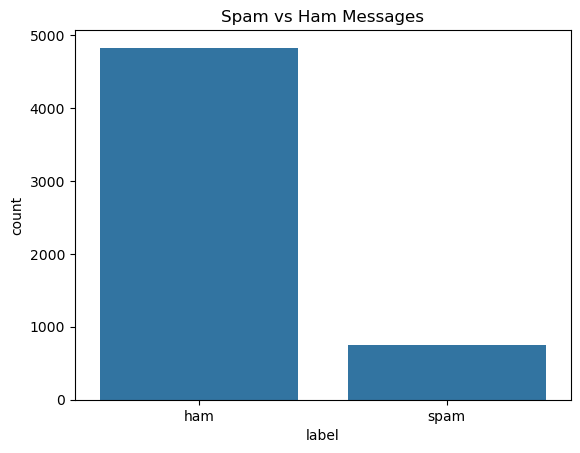

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Spam vs Ham Messages")
plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import re
import nltk         #Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Initialize
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define text cleaning function
def preprocess_text(text):
    text = text.lower()         #Lowercase
    text = re.sub(r'[a-z\s]', '', text)         # Remove punctuation and numbers
    words = text.split()                        # Tokenize
    words = [word for word in words if word not in stop_words]      # Remove stopwords
    words = [stemmer.stem(word) for word in words]          # Apply stemming
    return words

## Apply preprocessing
df['tokens'] = df['message'].apply(preprocess_text)

print(df[['message', 'tokens']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                              tokens  
0                        [,........]  
1                           [......]  
2  [2212005.87121()&'0845281007518']  
3                           [......]  
4                               [',]  


In [8]:
# TF-IDF = Term Frequency - Inverse Document Frequency
# for TF-IDF we need raw text strings-so join tokens back into text

df ['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


In [9]:
## Convert Text to Numbers using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# create the vectorizer
tfidf = TfidfVectorizer(max_features=3000)      # limit to top 3000 words

# Transform the text
x = tfidf.fit_transform(df['clean_text']).toarray()


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])   # ham -> 0, spam -> 1

In [11]:
print(x.shape)
print(y[:5])

(5572, 858)
[0 0 1 0 0]


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
## Train Classification Models

#1. Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
#2. Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
#3. Naive Bayes (best for text)

from sklearn.naive_bayes  import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {'Logistic Regression': lr, 'Random Forest': rf, 'Naive Bayes': nb}

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\n{name}")
    print("Acuuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Acuuracy: 0.9067264573991032
Confusion Matrix:
 [[959   6]
 [ 98  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       965
           1       0.90      0.35      0.50       150

    accuracy                           0.91      1115
   macro avg       0.90      0.67      0.72      1115
weighted avg       0.91      0.91      0.89      1115


Random Forest
Acuuracy: 0.9426008968609866
Confusion Matrix:
 [[957   8]
 [ 56  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.92      0.63      0.75       150

    accuracy                           0.94      1115
   macro avg       0.93      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115


Naive Bayes
Acuuracy: 0.8878923766816144
Confusion Matrix:
 [[964   1]
 [124  26]]
Classification Report:
             

In [20]:
## Compare Model accuraies

from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Naive Bayes': nb
}

accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9067
Random Forest Accuracy: 0.9426
Naive Bayes Accuracy: 0.8879


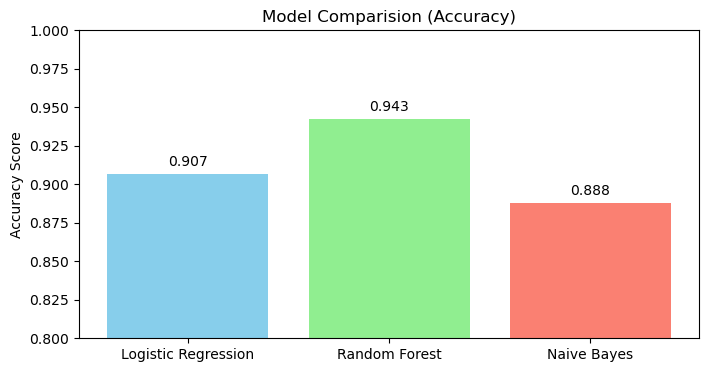

In [23]:
#Creating Bar chart of accuracies

import matplotlib.pyplot as plt

model_name = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(8, 4))
plt.bar(model_name, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparision (Accuracy)")
plt.ylabel("Accuracy Score")
plt.ylim(0.8, 1.0)
for i, score in enumerate(scores):
    plt.text(i, score + 0.005, f"{score:.3f}", ha='center', fontsize=10)

plt.show()

In [24]:
import joblib

joblib.dump(nb, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']

In [25]:
model = joblib.load('spam_classifier_model.pkl')